In [64]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


# fcm-E5

2022/10/20作成

fcm-eでは正則化パラメーターが10でも→+∞くらいの効果がある。  
0.1だと正則化が強すぎるので  
0.5から1くらいで調整する必要がありそう（lambdaと正則化の強さは反比例する。）

1と5で試す

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cp
import math
#sysはコマンドライン引数
import sys
import csv
np.seterr(divide='ignore', invalid='ignore')
#csvファイルの読み込み
iris = pd.read_csv("../../dataset/iris-dataset.csv")
df = iris.drop('species', axis=1)
#dfをnumpyで扱えるnp.ndarray変換
X = df.values
#配列の行数、列数の格納
X_size,dimension = X.shape

#クラスタ数宣言
c = 3
#Kはクラスタサイズ 
K = X_size /c
#交互最適化最大繰り返し数
max_iter = 100

#正則化パラメーター設定
lam = 5
lam_1= 1/lam

#ファジィパラメーター設定
m = 1

#初期値繰り返し回数
NumberOfRepetitions= 50

In [66]:
#uの最適化部分関数作成(fcm-e)
def u_optimize(d,c,lam):
    u = np.zeros((X_size,c))
    u_denominator = np.zeros((X_size,1))
    for i in range(X_size):
        #分母作成
        for j in range(c):
            u_denominator[i] += math.exp(-lam*d[i][j])
        #u[i]を計算
        for j in range(c):
            # if i <10:
            #     print(f"e**-lam*d_k{j}",math.exp(-lam*d[i][j]))
            u[i][j] = math.exp(-lam*d[i][j])/u_denominator[i]
        # print("i",i)
        # print("np.sumu[i]",np.sum(u[i]))
    return u

In [67]:
#クラスタ中心計算部分関数作成
def v_calculation(u,c,dimension,X):
    #分母計算
    v_denominator = np.sum(u,axis=0)  
    #分子計算
    v_numerator = np.zeros((c,dimension))
    for j in range(c):
        for i in range(X_size):
            v_numerator[j]+= u[i][j]*X[i]
   
    v = np.zeros((c,dimension ))
    for i in range(c):
        v[i] = v_numerator[i]/v_denominator[i]
    return v

In [68]:
for s in range (NumberOfRepetitions):
    centroids = X[np.random.choice(X_size,c)]
    for epoch in range(max_iter):
        #print(f"{epoch+1}回目")
        #dにはd11,d12,d13,d14,d21,d22,,,dn1,,dncの順でリスト作る
        d = np.zeros((X_size,c))
        for i in range(X_size):
            d[i] = np.sum((X[i]-centroids)**2,axis=1)
        #uの更新
        u = u_optimize(d,c,lam)
        #Jの計算
        #目的関数の計算
        J=0
        for i in range(X_size):
            for j in range(c):
                J += u[i][j]*d[i][j]+lam_1*u[i][j]*math.log(u[i][j])

        #vの更新
        new_centroids = v_calculation(u,c,dimension,X)

        # もしも重心が変わっていなかったら終了
        # if np.sum(np.abs(new_centroids-centroids))<=0.000001:
        if np.abs(new_centroids - centroids).max() <= 1e-7:
            #print(new_centroids-centroids)
            print("中心が変わらないのでbreakします！")
            break
        centroids = np.copy(new_centroids)

    #目的関数が小さくなっている時、cluster,best_J,best_centoridsの更新を行う
    if s == 0:
        np_cluster = np.argmax(u,axis=1)
        #最適な目的関数の更新
        best_J = J
        #目的関数が小さくなるときの重心を格納
        best_centroids = np.copy(new_centroids)
        best_u = np.copy(u)
    elif best_J > J:
        np_cluster = np.argmax(u,axis=1)
        #最適な目的関数の更新
        best_J = J
        #目的関数が小さくなるときの重心を格納
        best_centroids = np.copy(new_centroids)
        best_u = np.copy(u)
    print(f"{s+1}回目のクラスタリング結果↓")
    print(best_J)
    print(best_centroids)
    print("終了")
print(np_cluster)
print(best_J)
print(best_centroids)

中心が変わらないのでbreakします！
1回目のクラスタリング結果↓
78.53701055268941
[[5.006004   3.41796075 1.46406568 0.24403658]
 [6.83972699 3.07019584 5.71267712 2.06145106]
 [5.88996244 2.74436733 4.38653586 1.42777493]]
終了
中心が変わらないのでbreakします！
2回目のクラスタリング結果↓
78.5370105526887
[[5.88996245 2.74436734 4.38653587 1.42777494]
 [6.839727   3.07019584 5.71267714 2.06145107]
 [5.006004   3.41796075 1.46406568 0.24403658]]
終了
中心が変わらないのでbreakします！
3回目のクラスタリング結果↓
78.53701055268861
[[6.83972707 3.07019588 5.71267727 2.06145115]
 [5.006004   3.41796075 1.46406568 0.24403658]
 [5.88996251 2.74436735 4.38653594 1.42777497]]
終了
中心が変わらないのでbreakします！
4回目のクラスタリング結果↓
78.53701055268861
[[6.83972707 3.07019588 5.71267727 2.06145115]
 [5.006004   3.41796075 1.46406568 0.24403658]
 [5.88996251 2.74436735 4.38653594 1.42777497]]
終了
中心が変わらないのでbreakします！
5回目のクラスタリング結果↓
78.53701055268861
[[6.83972707 3.07019588 5.71267727 2.06145115]
 [5.006004   3.41796075 1.46406568 0.24403658]
 [5.88996251 2.74436735 4.38653594 1.42777497]]
終了
中心が変わらないのでb

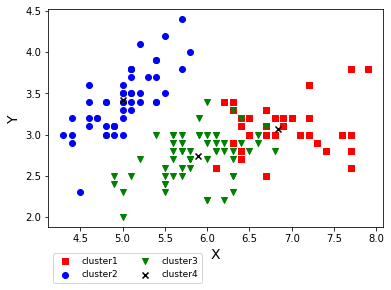

In [69]:
#matplotlibに描写

colors = ['red', 'blue', 'green','yellow','fuchsia']
markers = [",", "o", "v", "^", "<", ">", "1", "2", "3"]
fig = plt.figure()
ax = fig.add_subplot(111)
for i in range(c):
    ax.scatter(X[:, 0][np_cluster==i], X[:, 1][np_cluster==i], color=colors[i],marker=markers[i])
ax.scatter(best_centroids[:,0],best_centroids[:,1],color="black",marker="x")
ax.set_xlabel("X", size=14)
ax.set_ylabel("Y", size=14)
ax.legend(['cluster1', 'cluster2','cluster3','cluster4','cluster5',"center"],fontsize=9,ncol=2,bbox_to_anchor=(0, -0.1), loc='upper left')  # 凡例を表示

plt.show()

In [70]:
print("クラスター個数",np.bincount(np_cluster))

クラスター個数 [39 50 61]


In [71]:
print(np.sum(best_u,axis=1))
print(np.sum(best_u,axis=0))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]
[39.17333332 50.00213733 60.82452935]


In [73]:
best_u

array([[1.45121252e-55, 1.00000000e+00, 6.46248311e-26],
       [2.10931473e-56, 1.00000000e+00, 3.20104964e-25],
       [3.83863284e-60, 1.00000000e+00, 7.64200635e-28],
       [4.25726006e-57, 1.00000000e+00, 2.13930337e-25],
       [1.63803380e-56, 1.00000000e+00, 1.36132948e-26],
       [1.15016580e-46, 1.00000000e+00, 4.24387600e-21],
       [1.31879597e-58, 1.00000000e+00, 4.98352939e-27],
       [2.29898492e-54, 1.00000000e+00, 9.73311219e-25],
       [3.11383003e-60, 1.00000000e+00, 7.55681826e-27],
       [1.69419900e-55, 1.00000000e+00, 9.28701490e-25],
       [1.24148668e-51, 1.00000000e+00, 4.42823933e-24],
       [4.11086367e-54, 1.00000000e+00, 3.08793299e-24],
       [5.47611468e-58, 1.00000000e+00, 4.04858357e-26],
       [1.66398028e-67, 1.00000000e+00, 7.58881138e-32],
       [1.95390082e-54, 1.00000000e+00, 3.13741830e-27],
       [1.01025000e-48, 1.00000000e+00, 6.00264448e-24],
       [4.78813581e-54, 1.00000000e+00, 3.55559265e-26],
       [8.93355043e-55, 1.00000

##　正解とのクラスター番号を合わせる作業セル

In [74]:
#正解リスト作成
dff = pd.read_csv("../../dataset/iris-dataset.csv")
size_mapping = {"setosa": 0, "versicolor": 1, "virginica": 2}
seikai = iris["species"].map(size_mapping).values
seikai

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [78]:
np_cluster

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

上記の二つのリストを比較してnp_clusterの番号を変更していく

In [80]:
cluster_hensyuu = np_cluster
cluster_hensyuu_0 = np.where(cluster_hensyuu==1, 100, cluster_hensyuu)
cluster_hensyuu_1 = np.where(cluster_hensyuu_0==2, 1, cluster_hensyuu_0)
cluster_hensyuu_2 = np.where(cluster_hensyuu_1==0, 2, cluster_hensyuu_1)
cluster_hensyuu_3 = np.where(cluster_hensyuu_2==100, 0, cluster_hensyuu_2)
cluster_hensyuu_3

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [81]:
#------正解率の算出
dff = pd.read_csv("../../dataset/iris-dataset.csv")
size_mapping = {"setosa": 0, "versicolor": 1, "virginica": 2}
seikai = iris["species"].map(size_mapping).values

seikaisuu = np.count_nonzero(cluster_hensyuu_3==seikai)
seikairitu= (np.count_nonzero(cluster_hensyuu_3==seikai))/X_size*100
print("正解率")
print(seikairitu)
print("正解数")
print(seikaisuu)
print("クラスタサイズ確認")
print(np.count_nonzero(cluster_hensyuu_3==0))
print(np.count_nonzero(cluster_hensyuu_3==1))
print(np.count_nonzero(cluster_hensyuu_3==2))

正解率
88.66666666666667
正解数
133
クラスタサイズ確認
50
61
39


In [82]:
#引数(クラスタ数(c),クラスター(cluster),データセット(X),クラスター中心(v)、\
#ファジィ化パラム(m)、帰属度(u))

def calc_F(c,cluster,X,v,m,u):
    #中心間距離の作成
    center_distance = np.zeros((c,c))
    for i in range(c):
        for j in range(c):
            center_distance[i][j]= np.sum((v[i]-v[j])**2)
    print("center_distance")
    print(center_distance)
    #dにはd11,d12,d13,d14,d21,d22,,,dn1,,dncの順でリスト作る
    d_list=[]
    for i in range(X_size):
        for j in range(c):
            d_list.append(np.sum((X[i]-v[j])**2))
    d = np.array(d_list)
    d = d.reshape([X_size,c])
    print("d_{ki}")
    print(d[0])

    new_d = np.zeros((X_size,c))
    #ここが怪しい
    for i in range(c):
        new_d[cluster == i] = d[cluster == i]+center_distance[i]
    print("new_d{ki} = d_{ki}+d_{ii*}")
    print(new_d[0])

    #評価関数計算(ついでにJも再計算してあってるか確認)
    F = 0
    kakunin_J = 0
    u_m = u**m
    for i in range(X_size):
        F += np.sum(u[i] * new_d[i])
        kakunin_J += np.sum(u_m[i] * d[i])


    #この初期値のときの結果が優れている場合，bestを更新
    print("Jの値:",J)
    print("Jの値を再計算:",kakunin_J)
    print("Fの値:",F)
    return F

In [83]:
best_centroids

array([[6.83972701, 3.07019585, 5.71267715, 2.06145108],
       [5.006004  , 3.41796075, 1.46406568, 0.24403658],
       [5.88996246, 2.74436734, 4.38653588, 1.42777494]])

In [84]:
F = calc_F(c,np_cluster,X,best_centroids,1,best_u)
F

center_distance
[[ 0.         24.83717544  3.16841306]
 [24.83717544  0.         11.17717922]
 [ 3.16841306 11.17717922  0.        ]]
d_{ki}
[2.52755661e+01 2.16093175e-02 1.16218493e+01]
new_d{ki} = d_{ki}+d_{ii*}
[5.01127415e+01 2.16093175e-02 2.27990285e+01]
Jの値: 78.53701055268948
Jの値を再計算: 79.53780081802927
Fの値: 85.42775624108046


85.42775624108046

In [85]:
df

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [86]:
#pandasで分割結果を記入
df["cluster"]= np_cluster
df["u1"]=best_u[:,0]
df["u2"]=best_u[:,1]
df["u3"]=best_u[:,2]
df["J"] = best_J
df["F"] = F
df.to_csv('Iris-fcm-E5.csv',index = False)

In [87]:
print(np.sum(best_u,axis=1))
print(np.sum(best_u,axis=0))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]
[39.17333332 50.00213733 60.82452935]
